In [19]:
# Does not need to be executed if
# ~/.ipython/profile_default/ipython_config.py
# exists and contains:
# c.InteractiveShell.ast_node_interactivity = 'all'

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [20]:
from random import random
from itertools import count
from argparse import ArgumentParser
import re
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [10]:
def display_grid():
    for row in grid:
        print(*row)

In [11]:
size = 10
grid = [[0] * size for _ in range(size)]

In [12]:
display_grid()

0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0


In [38]:
# 1.0 Initialize the grid
grid = [[None] * size for _ in range(size)]

# 2.0 Populate the grid with some living cells with a density 'density'
density = 0.3
for i in range(size):
    for j in range(size):
        grid[i][j] = int(random() < density)
display_grid()

0 0 1 0 0 1 0 0 0 1
0 1 0 0 0 0 0 0 0 0
0 1 0 1 0 0 0 0 0 0
0 0 0 0 1 0 0 1 0 0
0 0 0 1 0 0 0 1 1 0
1 1 0 0 1 0 0 1 1 1
0 1 0 0 1 0 1 0 1 0
0 0 0 1 0 0 0 0 0 1
0 0 0 1 1 0 0 0 0 0
0 1 0 1 0 0 1 0 0 0


In [36]:
grid = [[None] * size] * size
for i in range(size):
    for j in range(size):
        grid[i][j] = int(random() < density)

display_grid()

0 0 0 1 0 0 0 1 0 1
0 0 0 1 0 0 0 1 0 1
0 0 0 1 0 0 0 1 0 1
0 0 0 1 0 0 0 1 0 1
0 0 0 1 0 0 0 1 0 1
0 0 0 1 0 0 0 1 0 1
0 0 0 1 0 0 0 1 0 1
0 0 0 1 0 0 0 1 0 1
0 0 0 1 0 0 0 1 0 1
0 0 0 1 0 0 0 1 0 1


In [42]:
L = [[0] * 3 for i in range(2)]; L
L[0][1] = 10; L
L[1][2] = 20; L # This is uniquely altered so our grid can be altered uniquely

[[0, 0, 0], [0, 0, 0]]

[[0, 10, 0], [0, 0, 0]]

[[0, 10, 0], [0, 0, 20]]

In [45]:
L = [[0] * 3] * 2; L # Doing this copies the position of each row in memory multiple times which results in unintende results
L[0][1] = 10; L # Notice here that the output of both columns has been altered
L[1][2] = 20; L # Similarly here

[[0, 0, 0], [0, 0, 0]]

[[0, 10, 0], [0, 10, 0]]

[[0, 10, 20], [0, 10, 20]]

In [75]:
# 3.0 Consolidating this into one line using two list comprehensions
density = 0.3
grid = [[int(random() < density) for _ in range(size)] for _ in range(size)] 
display_grid()

1 0 0 1 0 0 0 0 0 1
1 1 0 0 0 0 0 0 0 0
0 0 0 0 0 1 0 0 0 0
1 0 1 0 0 0 0 0 1 0
0 0 1 0 1 0 0 0 0 0
1 0 0 1 0 0 1 0 0 0
0 0 0 0 0 0 1 0 1 1
0 0 0 0 1 1 0 0 0 0
0 0 0 0 0 0 0 1 0 0
0 1 0 0 0 1 0 0 0 1


In [108]:
# 4.0 Using an alternative method to display the grid using more visible
def display_population():
    squares = {0: '\u2b1c', 1: '\u2b1b'}
    for row in grid:
        for column in row:
            print(squares[column], end='')
        print()

display_population()

⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬛⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬛⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬛⬜⬜⬜⬛⬜⬜⬜⬜
⬜⬜⬛⬜⬜⬛⬜⬜⬜⬜
⬜⬜⬜⬛⬛⬛⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜


In [109]:
# 4.0 Updated using a join function instead of another nested for loop
def display_population():
    squares = {0: '\u2b1c', 1: '\u2b1b'}
    for row in grid:
        print(''.join(f'{squares[e]}' for e in row))

display_population()

⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬛⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬛⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬛⬜⬜⬜⬛⬜⬜⬜⬜
⬜⬜⬛⬜⬜⬛⬜⬜⬜⬜
⬜⬜⬜⬛⬛⬛⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜


In [121]:
def next_generation():
    global grid
    new_grid = [[None] * size for _ in range(size)]
    for i in range(size):
        for j in range(size):
            nb_of_neighbours = 0
            # "if i" will not run if i = 0 i.e. 
            
            # Above left
            if i and j and grid[i - 1][j - 1]:
                nb_of_neighbours += 1
                
            # Above
            if i and grid[i - 1][j]:
                nb_of_neighbours += 1
                
            # Above right
            if i and j < size - 1 and grid[i - 1][j + 1]:
                nb_of_neighbours += 1
                
            # Left
            if j and grid[i][j - 1]:
                nb_of_neighbours += 1
                
            # Right
            if j < size - 1 and grid[i][j + 1]:
                nb_of_neighbours += 1
                
            # Below left
            if i < size - 1 and j and grid[i + 1][j - 1]:
                nb_of_neighbours += 1
                
            # Below
            if i < size - 1 and grid[i + 1][j]:
                nb_of_neighbours += 1
                
            # Below right
            if i < size - 1 and j < size - 1 and grid[i + 1][j + 1]:
                nb_of_neighbours += 1
                
            new_grid[i][j] = int(grid[i][j] and nb_of_neighbours == 2
                                 or nb_of_neighbours == 3
                                )
    grid = new_grid
    
next_generation()
display_population()
print()

⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬛⬜
⬜⬜⬜⬜⬜⬜⬛⬛⬛⬛
⬜⬛⬛⬛⬛⬛⬜⬜⬜⬛
⬜⬜⬜⬛⬜⬜⬜⬜⬜⬛
⬜⬜⬛⬛⬛⬜⬜⬜⬜⬛
⬜⬛⬜⬜⬜⬛⬜⬜⬜⬛
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬛⬛⬜



In [128]:
framed_grid = [[0] * (size + 2) for _ in range(size + 2)]
for i in range(1, size + 1):
    for j in range(1, size + 1):
        framed_grid[i][j] = int(random() < density)

def display_population_within_frame(grid):
    squares = {0: '\u2b1c', 1: '\u2b1b'}
    for i in range(1, size + 1):
        print(''.join(f'{squares[grid[i][j]]}'
                              for j in range(1, size + 1)
                     )
             )
        
def next_generation_within_frame():
    global framed_grid
    new_framed_grid = [[0] * (size + 2) for _ in range(size + 2)]
    for i in range(1, size + 1):
        for j in range(1, size + 1):
            nb_of_neighbours = sum((framed_grid[i - 1][j - 1],
                                    framed_grid[i - 1][j],
                                    framed_grid[i - 1][j + 1],
                                    framed_grid[i][j - 1],
                                    framed_grid[i][j + 1],
                                    framed_grid[i + 1][j - 1],
                                    framed_grid[i + 1][j],
                                    framed_grid[i + 1][j + 1]
                                   )
                                  )
            new_framed_grid[i][j] = int(framed_grid[i][j]
                                        and nb_of_neighbours == 2
                                        or nb_of_neighbours == 3
                                       )
    framed_grid = new_framed_grid

display_population_within_frame(framed_grid)
print()

next_generation_within_frame()
display_population_within_frame(framed_grid)
print()

next_generation_within_frame()
display_population_within_frame(framed_grid)

⬜⬜⬜⬜⬜⬜⬜⬛⬛⬜
⬜⬜⬛⬛⬜⬜⬛⬜⬛⬜
⬛⬜⬜⬜⬛⬜⬛⬜⬛⬛
⬜⬜⬜⬛⬜⬜⬜⬜⬜⬜
⬜⬜⬛⬛⬛⬜⬜⬛⬜⬛
⬜⬜⬜⬛⬜⬜⬜⬜⬜⬜
⬛⬜⬜⬜⬜⬜⬛⬜⬛⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬛
⬜⬛⬜⬜⬜⬜⬜⬜⬛⬜
⬛⬜⬜⬜⬜⬛⬛⬛⬜⬜

⬜⬜⬜⬜⬜⬜⬜⬛⬛⬜
⬜⬜⬜⬛⬜⬛⬛⬜⬜⬜
⬜⬜⬛⬜⬛⬛⬜⬜⬛⬛
⬜⬜⬛⬜⬜⬛⬜⬛⬜⬛
⬜⬜⬛⬜⬛⬜⬜⬜⬜⬜
⬜⬜⬛⬛⬛⬜⬜⬛⬛⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬛⬛⬛
⬜⬜⬜⬜⬜⬜⬛⬛⬛⬜
⬜⬜⬜⬜⬜⬜⬛⬛⬜⬜

⬜⬜⬜⬜⬜⬜⬛⬛⬜⬜
⬜⬜⬜⬛⬜⬛⬛⬜⬜⬛
⬜⬜⬛⬜⬜⬜⬜⬛⬛⬛
⬜⬛⬛⬜⬜⬛⬛⬜⬜⬛
⬜⬛⬛⬜⬛⬛⬛⬛⬜⬜
⬜⬜⬛⬜⬛⬜⬜⬜⬜⬜
⬜⬜⬜⬛⬜⬜⬜⬜⬜⬛
⬜⬜⬜⬜⬜⬜⬛⬜⬜⬛
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬛
⬜⬜⬜⬜⬜⬜⬛⬜⬛⬜


In [143]:
# 1 dimension
L = np.array([0, 1, 2, 3, 4, 5, 6, 7])

L, L.dtype, L.size, L.shape

(array([0, 1, 2, 3, 4, 5, 6, 7]), dtype('int64'), 8, (8,))

In [144]:
L.reshape((1, 8))

array([[0, 1, 2, 3, 4, 5, 6, 7]])

In [153]:
L.reshape((8, 1))

array([[10],
       [ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7]])

In [146]:
L.reshape((2, 4))

array([[0, 1, 2, 3],
       [4, 5, 6, 7]])

In [147]:
L.reshape((4, 2))

array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7]])

In [154]:
# Viewed in 3 dimensions.
L.reshape((2, 2, 2))

array([[[10,  1],
        [ 2,  3]],

       [[ 4,  5],
        [ 6,  7]]])

In [149]:
L

array([0, 1, 2, 3, 4, 5, 6, 7])

In [150]:
L.reshape(2, 2, 2)[0, 0, 0] = 10

In [151]:
L

array([10,  1,  2,  3,  4,  5,  6,  7])

In [155]:
L = np.array(range(16))

L
L[10]
L[8 : 13]

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

10

array([ 8,  9, 10, 11, 12])

In [158]:
L = np.array(range(16)).reshape(2, 8)

L
L[1, 2]
L[1, :]
L[1 : 2, :]
L[:, 3]
L[:, 3 : 4]

array([[ 0,  1,  2,  3,  4,  5,  6,  7],
       [ 8,  9, 10, 11, 12, 13, 14, 15]])

10

array([ 8,  9, 10, 11, 12, 13, 14, 15])

array([[ 8,  9, 10, 11, 12, 13, 14, 15]])

array([ 3, 11])

array([[ 3],
       [11]])

In [159]:
np.zeros((2, 2))
np.zeros((2, 2), int)

array([[0., 0.],
       [0., 0.]])

array([[0, 0],
       [0, 0]])

In [175]:
np_framed_grid = np.zeros((7, 7), int)
np_framed_grid[2 : 5, 2 : 5] = 1
np_framed_grid[3, 3] = 0

# A "framed" grid
np_framed_grid
# The "inside" of the grid, without the surrounding "frame"
np_framed_grid[1 : -1, 1 : -1]

array([[0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 1, 1, 0, 0],
       [0, 0, 1, 0, 1, 0, 0],
       [0, 0, 1, 1, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0]])

array([[0, 0, 0, 0, 0],
       [0, 1, 1, 1, 0],
       [0, 1, 0, 1, 0],
       [0, 1, 1, 1, 0],
       [0, 0, 0, 0, 0]])

In [195]:
L = np.array(range(49)).reshape((7,7))

In [196]:
L

array([[ 0,  1,  2,  3,  4,  5,  6],
       [ 7,  8,  9, 10, 11, 12, 13],
       [14, 15, 16, 17, 18, 19, 20],
       [21, 22, 23, 24, 25, 26, 27],
       [28, 29, 30, 31, 32, 33, 34],
       [35, 36, 37, 38, 39, 40, 41],
       [42, 43, 44, 45, 46, 47, 48]])

In [197]:
L[2:5, 2:5]

array([[16, 17, 18],
       [23, 24, 25],
       [30, 31, 32]])

In [198]:
L[1:-1, 1:-1]

array([[ 8,  9, 10, 11, 12],
       [15, 16, 17, 18, 19],
       [22, 23, 24, 25, 26],
       [29, 30, 31, 32, 33],
       [36, 37, 38, 39, 40]])

In [210]:
# Setting rows
L[0:1,:] = 0
L[-1:,:] = 0

# Setting columns
L[:,0:1] = 0
L[:,-1:] = 0

In [211]:
L

array([[ 0,  0,  0,  0,  0,  0,  0],
       [ 0,  8,  9, 10, 11, 12,  0],
       [ 0, 15, 16, 17, 18, 19,  0],
       [ 0, 22, 23, 24, 25, 26,  0],
       [ 0, 29, 30, 31, 32, 33,  0],
       [ 0, 36, 37, 38, 39, 40,  0],
       [ 0,  0,  0,  0,  0,  0,  0]])

In [212]:
np_framed_grid = np.zeros((7, 7), int)
np_framed_grid[2 : 5, 2 : 5] = 1
np_framed_grid[3, 3] = 0

# A "framed" grid
np_framed_grid
# The "inside" of the grid, without the surrounding "frame"
np_framed_grid[1 : -1, 1 : -1]

array([[0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 1, 1, 0, 0],
       [0, 0, 1, 0, 1, 0, 0],
       [0, 0, 1, 1, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0]])

array([[0, 0, 0, 0, 0],
       [0, 1, 1, 1, 0],
       [0, 1, 0, 1, 0],
       [0, 1, 1, 1, 0],
       [0, 0, 0, 0, 0]])

In [213]:
np_above_left = np_framed_grid[: -2, : -2]
np_left = np_framed_grid[1 : -1, : -2]
np_below_left = np_framed_grid[2 :, : -2]

np_above = np_framed_grid[: -2, 1 : -1]
np_below = np_framed_grid[2 :, 1 : -1]

np_above_right = np_framed_grid[: -2, 2 :]
np_right = np_framed_grid[1 : -1, 2 :]
np_below_right = np_framed_grid[2 :, 2 :]

In [214]:
np_above_left + np_left + np_below_left + np_above + np_below + np_above_right\
+ np_right + np_below_right

array([[1, 2, 3, 2, 1],
       [2, 2, 4, 2, 2],
       [3, 4, 8, 4, 3],
       [2, 2, 4, 2, 2],
       [1, 2, 3, 2, 1]])

In [226]:
A = np.array((0, 0, 1, 2)).reshape(2, 2)
B = np.array((True, False, True, False)).reshape(2, 2)

A

array([[0, 0],
       [1, 2]])

In [232]:
B.astype(int)

array([[1, 0],
       [1, 0]])

In [233]:
np.logical_or(A, B).astype(int)

array([[1, 0],
       [1, 1]])

In [234]:
np.logical_and(A, B).astype(int)

array([[0, 0],
       [1, 0]])

In [255]:
np_framed_grid = np.zeros((size + 2, size + 2), int)
for i in range(1, size + 1):
    for j in range(1, size + 1):
        np_framed_grid[i, j] = int(random() < density)

print(np_framed_grid)
        
display_population_within_frame(np_framed_grid)
print()
        
def np_next_generation_within_frame():
    global np_framed_grid
    number_of_neighbours = np.zeros((size + 2, size + 2))
    number_of_neighbours[1 : -1, 1 : -1]\
            = np_framed_grid[  : -2,   : -2]\
            + np_framed_grid[  : -2, 1 : -1]\
            + np_framed_grid[  : -2, 2 :   ]\
            + np_framed_grid[1 : -1,   : -2]\
            + np_framed_grid[1 : -1, 2 :   ]\
            + np_framed_grid[2 :   ,   : -2]\
            + np_framed_grid[2 :   , 1 : -1]\
            + np_framed_grid[2 :   , 2 :   ]
    
    np_framed_grid = np.logical_or(np.logical_and(np_framed_grid == 1,
                                                  number_of_neighbours == 2
                                                 ), number_of_neighbours == 3
                                  ).astype(int)


np_next_generation_within_frame()
display_population_within_frame(np_framed_grid)
print()

np_next_generation_within_frame()
display_population_within_frame(np_framed_grid)

[[0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0]
 [0 1 0 0 0 0 0 1 0 1 0 0]
 [0 1 1 0 1 0 1 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 1 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0]
 [0 1 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 1 0 1 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]
⬜⬜⬜⬜⬜⬜⬛⬜⬜⬜
⬛⬜⬜⬜⬜⬜⬛⬜⬛⬜
⬛⬛⬜⬛⬜⬛⬜⬜⬛⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬛
⬜⬜⬛⬜⬜⬜⬜⬜⬜⬜
⬛⬜⬜⬜⬜⬜⬜⬜⬜⬛
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬛⬜⬜⬜⬜
⬛⬜⬜⬜⬜⬛⬜⬜⬜⬜
⬜⬜⬜⬛⬜⬛⬜⬜⬜⬛

⬜⬜⬜⬜⬜⬜⬜⬛⬜⬜
⬛⬛⬜⬜⬜⬛⬛⬜⬜⬜
⬛⬛⬜⬜⬜⬜⬜⬛⬛⬛
⬜⬛⬛⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬛⬛⬜⬜⬜
⬜⬜⬜⬜⬛⬜⬜⬜⬜⬜

⬜⬜⬜⬜⬜⬜⬛⬜⬜⬜
⬛⬛⬜⬜⬜⬜⬛⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬛⬛⬛⬜
⬛⬛⬛⬜⬜⬜⬜⬜⬛⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬛⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬛⬜⬜⬜⬜


In [236]:
print(size)

10


In [ ]:
np_framed_grid = np.zeros((size + 2, size + 2), int)
for i in range(1, size + 1):
    for j in range(1, size + 1):
        np_framed_grid[i, j] = int(random() < density)
        
display_population_within_frame(np_framed_grid)
print()
        
def np_next_generation_within_frame():
    global np_framed_grid
    number_of_neighbours = np.zeros((size + 2, size + 2))
    number_of_neighbours[1 : -1, 1 : -1]\
            = np_framed_grid[  : -2,   : -2]\# above left
            + np_framed_grid[  : -2, 1 : -1]\# above
            + np_framed_grid[  : -2, 2 :   ]\# above right    
            + np_framed_grid[1 : -1,   : -2]\# left
            + np_framed_grid[1 : -1, 2 :   ]\# right
            + np_framed_grid[2 :   ,   : -2]\# below left
            + np_framed_grid[2 :   , 1 : -1]\# below
            + np_framed_grid[2 :   , 2 :   ]# below right
    
    np_framed_grid = np.logical_or(np.logical_and(np_framed_grid == 1,
                                                  number_of_neighbours == 2
                                                 ), number_of_neighbours == 3
                                  ).astype(int)


np_next_generation_within_frame()
display_population_within_frame(np_framed_grid)
print()

np_next_generation_within_frame()
display_population_within_frame(np_framed_grid)

In [262]:
with open('gosperglidergun.rle') as file:
    for line in file:
        print(line)

#N Gosper glider gun

#O Bill Gosper

#C A true period 30 glider gun.

#C The first known gun and the first known finite pattern with unbounded growth.

#C www.conwaylife.com/wiki/index.php?title=Gosper_glider_gun

x = 36, y = 9, rule = B3/S23

24bo11b$22bobo11b$12b2o6b2o12b2o$11bo3bo4b2o12b2o$2o8bo5bo3b2o14b$2o8b

o3bob2o4bobo11b$10bo5bo7bo11b$11bo3bo20b$12b2o!


In [263]:
# 1.0 We read the file input and extract a list of all of the inputs (separated by '$')
with open('gosperglidergun.rle') as file:
    for line in file:
        if line.startswith('#'):
            continue
        x, y = (int(e) for e in re.search('(\d+)[^\d]*(\d+)', line).groups())
        break
    lines = ''.join(line.strip() for line in file)[: -1].split('$')

lines

['24bo11b',
 '22bobo11b',
 '12b2o6b2o12b2o',
 '11bo3bo4b2o12b2o',
 '2o8bo5bo3b2o14b',
 '2o8bo3bob2o4bobo11b',
 '10bo5bo7bo11b',
 '11bo3bo20b',
 '12b2o']

In [294]:
# Setting some configs for our script
max_nb_of_iterations = 1_000


In [283]:
# We set some parameters such that we can account for elements spreading out of the boundary we have specified 
# We specify two points: i and j to be the starting points (0, 0) for our game of life
pattern_size_multiplier = 5
size = max(x, y) * pattern_size_multiplier
size
i, j = (size-y) // 2, (size-x) // 2
y, x
i, j

180

(9, 36)

(85, 72)

In [285]:
lines = ['', '50', 'b', '2b50', 'o50', '2o', 'b2o5bob8o10b', '2o5b8obo11b13o50']
for line in lines:
    print(line)


50
b
2b50
o50
2o
b2o5bob8o10b
2o5b8obo11b13o50


In [272]:
i = 0
j = 0

In [274]:
lines = '', '50', 'b', '2b50', 'o50', '2o', 'b2o5bob8o10b', '2o5b8obo11b13o50'
i, j = 0, 0

for line in lines:
    print()
    if not line:
        print('Case 0: line is empty')
        i += 1
        print('Make i equal to', i)
        continue
    if line.isdigit():
        print('Case 1: line is', line)
        i += int(line)
        print('Make i equal to ', i)
        continue
    print('Case 2: line is', line)
    line, nb_of_new_lines = re.match('(.*[^\d])(\d*)', line).groups()
    print('line becomes', line)
    try:
        i += int(nb_of_new_lines)
        print('\tCase 2.1: make i equal to', i)
    except ValueError:
        i += 1
        print('\tCase 2.2: make i equal to', i)
    line = line.split('b')
    print('\tAfter splitting with "b", line becomes:', line)
    if line[0].find('o') >= 0:
        run_spans = [j]           
        print('\t\tCase I: run_spans initialised to:', run_spans)
    else:
        try:
            run_spans = [j + int(line.pop(0))]
            print('\t\tCase II.1: run_spans initialised to:', run_spans)
            print('\t\tline becomes', line)
        except ValueError:
            run_spans = [j + 1]                
            print('\t\tCase II.2: run_spans initialised to:', run_spans)
            print('\t\tline becomes', line)
    for e in line:
        if not e:
            print('\t\tEmpty string, not processed')
            break
        print('\t\tProcessing', e, 'split with "o" to', e.split('o'))
        for run_span in e.split('o'):
            try:
                run_spans.append(run_spans[-1] + int(run_span))
                print('\t\t\tCase α, run_spans becomes:', run_spans)
            except ValueError:
                run_spans.append(run_spans[-1] + 1)
                print('\t\t\tCase β, run_spans becomes:', run_spans)


Case 0: line is empty
Make i equal to 1

Case 1: line is 50
Make i equal to  51

Case 2: line is b
line becomes b
	Case 2.2: make i equal to 52
	After splitting with "b", line becomes: ['', '']
		Case II.2: run_spans initialised to: [1]
		line becomes ['']
		Empty string, not processed

Case 2: line is 2b50
line becomes 2b
	Case 2.1: make i equal to 102
	After splitting with "b", line becomes: ['2', '']
		Case II.1: run_spans initialised to: [2]
		line becomes ['']
		Empty string, not processed

Case 2: line is o50
line becomes o
	Case 2.1: make i equal to 152
	After splitting with "b", line becomes: ['o']
		Case I: run_spans initialised to: [0]
		Processing o split with "o" to ['', '']
			Case β, run_spans becomes: [0, 1]
			Case β, run_spans becomes: [0, 1, 2]

Case 2: line is 2o
line becomes 2o
	Case 2.2: make i equal to 153
	After splitting with "b", line becomes: ['2o']
		Case I: run_spans initialised to: [0]
		Processing 2o split with "o" to ['2', '']
			Case α, run_spans become

In [286]:
with open('gosperglidergun.rle') as file:
    for line in file:
        if line.startswith('#'):
            continue
        x, y = (int(e) for e in re.search('(\d+)[^\d]*(\d+)', line).groups())
        break
    lines = ''.join(line.strip() for line in file)[: -1].split('$')
size = max(x, y) * pattern_size_multiplier
grid = np.zeros((size, size), int)
i, j = (size - y) // 2, (size - x) // 2
for line in lines:
    if not line:
        i += 1
        continue
    if line.isdigit():
        i += int(line)
        continue
    line, nb_of_new_lines = re.match('(.*[^\d])(\d*)', line).groups()
    line = line.split('b')
    if line[0].find('o') >= 0:
        run_lengths = [j]           
    else:
        try:
            run_lengths = [j + int(line.pop(0))]
        except ValueError:
            run_lengths = [j + 1]                
    for e in line:
        if not e:
            break
        for run_length in e.split('o'):
            try:
                run_lengths.append(run_lengths[-1] + int(run_length))
            except ValueError:
                run_lengths.append(run_lengths[-1] + 1)
    for n in range(len(run_lengths) // 2):
        grid[i, run_lengths[2 * n] : run_lengths[2 * n + 1]] = 1
    try:
        i += int(nb_of_new_lines)
    except ValueError:
        i += 1
print(grid[i - y : i, j : j + x])

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1]
 [1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


In [287]:
animation_intervals = 20

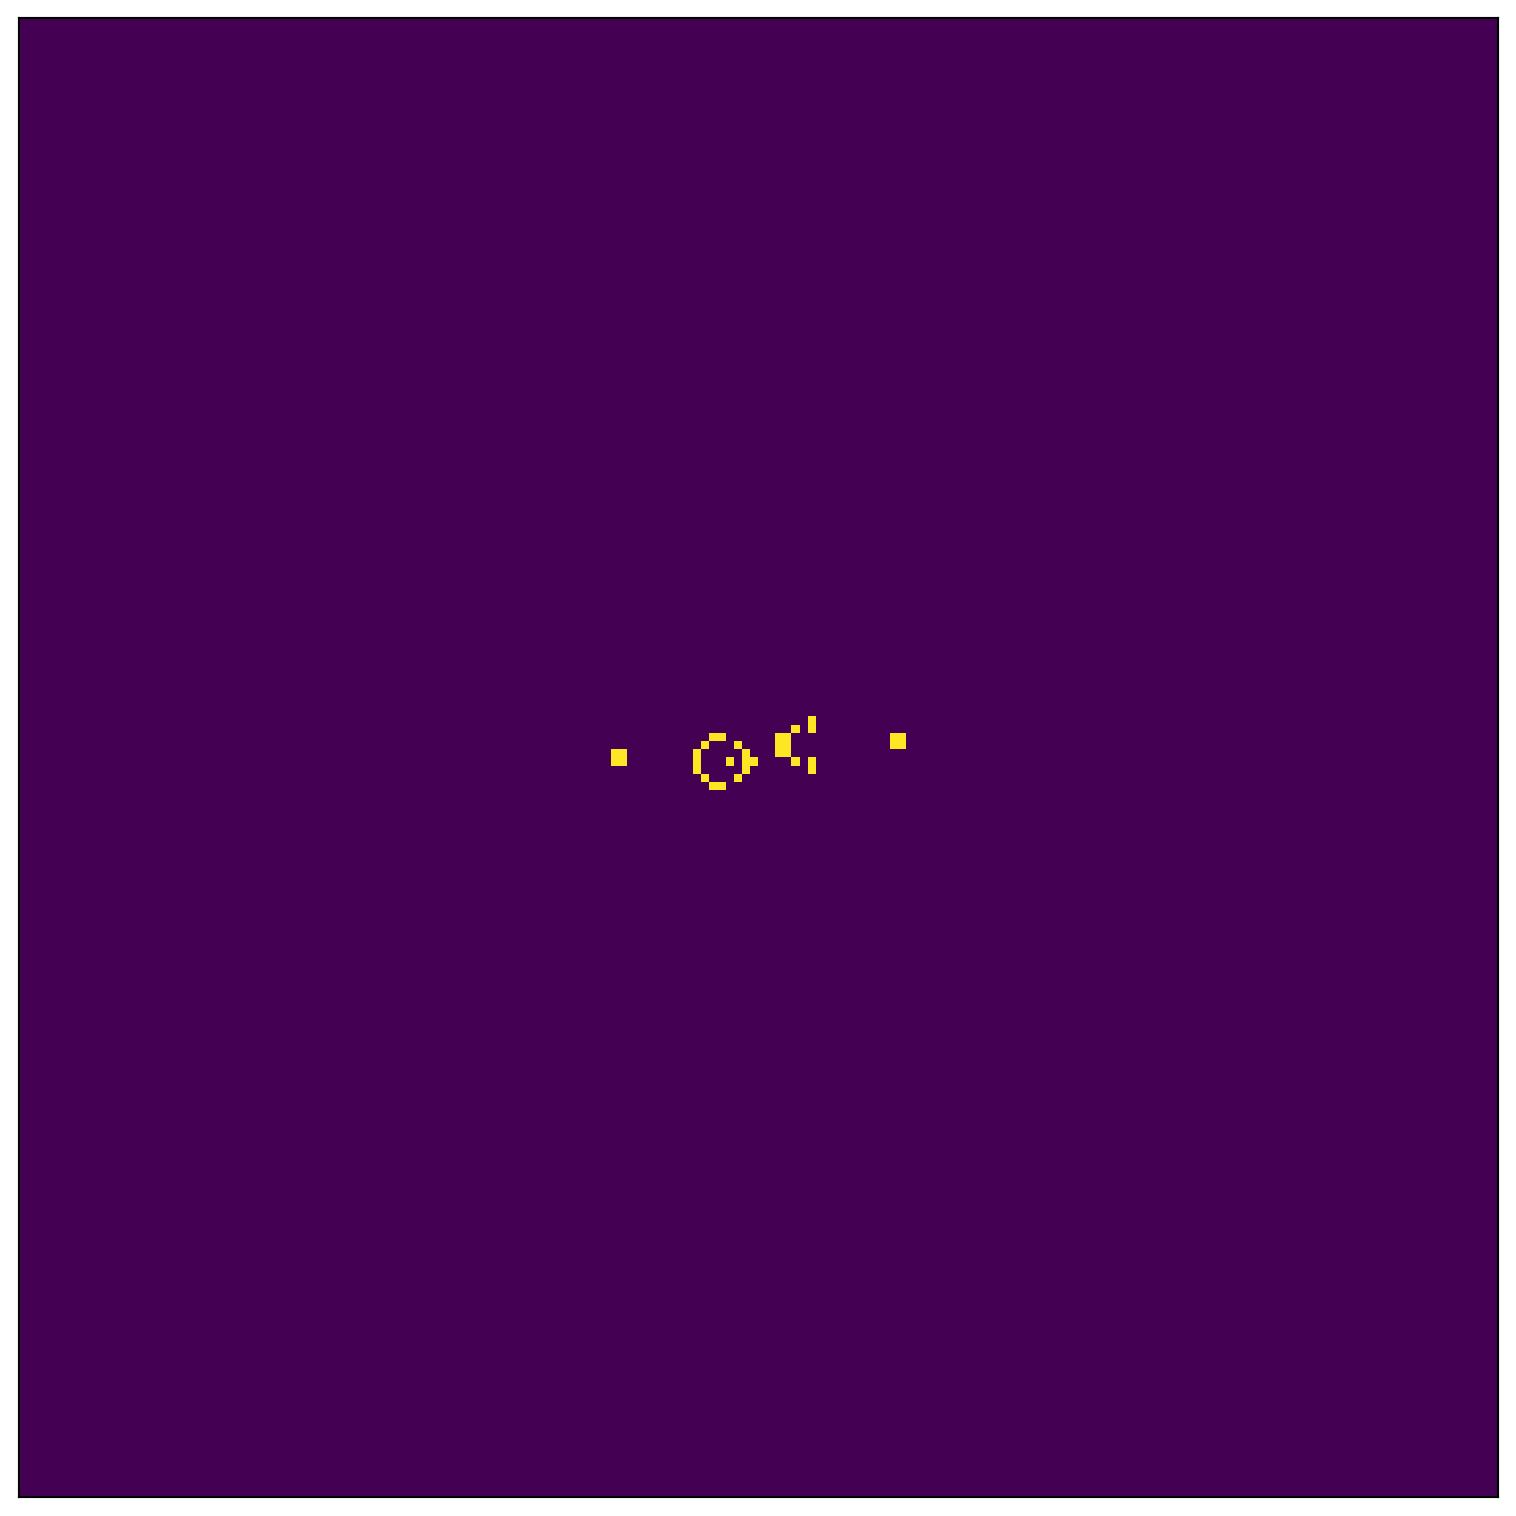

In [288]:
figure_size = 10, 10
figure = plt.figure(figsize=figure_size, dpi=192)
plt.xticks([])
plt.yticks([])
population_state = plt.imshow(grid)
current_iteration = plt.text(5, -5, '', c='red');

In [289]:
def evolve(i):
    global grid
    number_of_neighbours = np.zeros(grid.shape)
    number_of_neighbours[1 : -1, 1 : -1] =\
            grid[: -2, : -2] + grid[: -2, 1 : -1] + grid[: -2, 2 :]\
            + grid[1 : -1, : -2] + grid[1 : -1, 2 :]\
            + grid[2 :, : -2]   + grid[2 :, 1 : -1]  + grid[2 :, 2 :]
    grid = np.logical_or(np.logical_and(grid == 1, number_of_neighbours == 2
                                       ), number_of_neighbours == 3
                        ).astype(int)
    population_state.set_data(grid)
    current_iteration.set_text(f'Iteration: {str(i)}')
    return population_state, current_iteration

In [290]:
def test_count(start=None):
    if start is None:
        for i in count():
            if i > 3:
                return
            yield i
    else:
        for i in count(start):
            if i > start + 3:
                return
            yield i

list(test_count())
list(test_count(10))

[0, 1, 2, 3]

[10, 11, 12, 13]

In [291]:
def keep_going_or_stop():
    for i in count():
        if any(grid[1, 1 : -1]) or any(grid[-2, 1 : -1])\
           or any(grid[1 : -1, 1]) or any(grid[1 : -1, -2]):
            return
        yield i

In [295]:
evolution = animation.FuncAnimation(figure, evolve, frames=keep_going_or_stop,
                                    interval=animation_intervals,
                                    save_count=max_nb_of_iterations
                                   )

In [ ]:
evolution.save('gosperglidergun.mp4')

In [297]:
re.sub('\..*', '', 'gosperglidergun.rle')
re.sub('\..*', '.mp4', 'gosperglidergun.rle')

'gosperglidergun'

'gosperglidergun.mp4'

In [298]:
def create_mp4_file(rle_filename):
    filename = re.sub('\..*', '', rle_filename)
    if os.path.isfile(filename + '.mp4'):
        for i in count(1):
            mp4_filename = ''.join((filename, '_', str(i), '.mp4'))
            if not os.path.isfile(mp4_filename):
                break
    else:
        mp4_filename = filename + '.mp4'
    os.system(f'touch {mp4_filename}')
        
os.system('touch my_rle_file.rle')
print('Files whose name starts with "my_rle_file":')
%ls my_rle_file*
for _ in range(3):
    create_mp4_file('my_rle_file.rle')
    print('\nFiles whose name starts with "my_rle_file":')
    %ls my_rle_file*
%rm my_rle_file*
print('\nFiles whose name starts with "my_rle_file":');

Files whose name starts with "my_rle_file":
my_rle_file.rle

Files whose name starts with "my_rle_file":
my_rle_file.mp4  my_rle_file.rle

Files whose name starts with "my_rle_file":
my_rle_file.mp4    my_rle_file.rle    my_rle_file_1.mp4

Files whose name starts with "my_rle_file":
my_rle_file.mp4    my_rle_file.rle    my_rle_file_1.mp4  my_rle_file_2.mp4

Files whose name starts with "my_rle_file":


In [299]:
parser = ArgumentParser()

parser

ArgumentParser(prog='ipykernel_launcher.py', usage=None, description=None, formatter_class=<class 'argparse.HelpFormatter'>, conflict_handler='error', add_help=True)

In [300]:
parser.add_argument('--rle_filename', dest='rle_filename', required=True)

_StoreAction(option_strings=['--rle_filename'], dest='rle_filename', nargs=None, const=None, default=None, type=None, choices=None, required=True, help=None, metavar=None)

In [301]:
parser.add_argument('--figure_size', dest='figure_size', default=(10, 10),
                    nargs=2, type=int
                   )
parser.add_argument('--pattern_size_multiplier',
                    dest='pattern_size_multiplier'
                   )
parser.add_argument('--max_nb_of_iterations', dest='max_nb_of_iterations',
                    default=1_000, type=int
                   )
parser.add_argument('--animation_intervals', dest='animation_intervals',
                    default=20, type=int
                   )

_StoreAction(option_strings=['--figure_size'], dest='figure_size', nargs=2, const=None, default=(10, 10), type=<class 'int'>, choices=None, required=False, help=None, metavar=None)

_StoreAction(option_strings=['--pattern_size_multiplier'], dest='pattern_size_multiplier', nargs=None, const=None, default=None, type=None, choices=None, required=False, help=None, metavar=None)

_StoreAction(option_strings=['--max_nb_of_iterations'], dest='max_nb_of_iterations', nargs=None, const=None, default=1000, type=<class 'int'>, choices=None, required=False, help=None, metavar=None)

_StoreAction(option_strings=['--animation_intervals'], dest='animation_intervals', nargs=None, const=None, default=20, type=<class 'int'>, choices=None, required=False, help=None, metavar=None)

In [305]:
!python3 b3_s23_movie.py --rle_filename gosperglidergun.rle

Traceback (most recent call last):
  File "/Users/kevinngx/Documents/kevinngx-github-uni/UNSW-COMP9021/Week 07/L14 The Game of Life/b3_s23_movie.py", line 72, in <module>
    grid = np.zeros((size, size), np.int)
                                  ^^^^^^
  File "/Users/kevinngx/.pyenv/versions/3.11.0/lib/python3.11/site-packages/numpy/__init__.py", line 305, in __getattr__
    raise AttributeError(__former_attrs__[attr])
AttributeError: module 'numpy' has no attribute 'int'.
`np.int` was a deprecated alias for the builtin `int`. To avoid this error in existing code, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.

In [304]:
!ls

L14 Working Notes [kevinngx].ipynb b3_s23_movie.py
The game of life.html              game_of_life.py
The game of life.ipynb             gosperglidergun.mp4
all.tar.gz                         gosperglidergun.rle
